In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

df = pd.read_excel('data.xlsx')
df.rename(columns=df.iloc[0], inplace=True)
df = df.drop(df.index[0])
df = df.dropna(subset=['label'])
df = df.dropna(axis=1)
df = df.drop(columns=['번호','날짜','시간','시편상태','요약','수막두께'])
df = df.apply(pd.to_numeric)
df.columns

X = df.drop('label',axis=1).values
y = df['label'].values

from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=101)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
######## LogisticRegression ########

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions_1 = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions_1))
print(classification_report(y_test, predictions_1))

[[4401  279]
 [ 475 6548]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4680
           1       0.96      0.93      0.95      7023

    accuracy                           0.94     11703
   macro avg       0.93      0.94      0.93     11703
weighted avg       0.94      0.94      0.94     11703



C:\Users\strai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
##### Support Vector Machine #####

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

predictions_2 = svc_model.predict(X_test)
print(confusion_matrix(y_test, predictions_2))
print(classification_report(y_test, predictions_2))

[[4499  181]
 [ 355 6668]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4680
           1       0.97      0.95      0.96      7023

    accuracy                           0.95     11703
   macro avg       0.95      0.96      0.95     11703
weighted avg       0.95      0.95      0.95     11703



[[4317  363]
 [ 471 6552]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4680
           1       0.95      0.93      0.94      7023

    accuracy                           0.93     11703
   macro avg       0.92      0.93      0.93     11703
weighted avg       0.93      0.93      0.93     11703



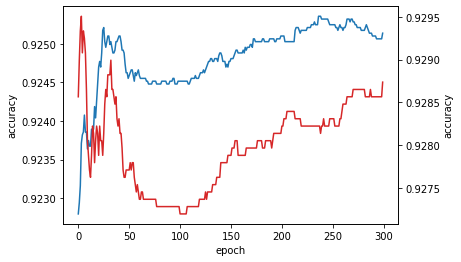

In [12]:
##### SGD Classifier #####

from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=100,random_state=42)
sc.fit(X_train,y_train)
classes=np.unique(y_train)

train_score=[]
test_score=[]

for _ in range(0,300):
    sc.partial_fit(X_train,y_train,classes=classes)
    train_score.append(sc.score(X_train,y_train))
    test_score.append(sc.score(X_test,y_test))

predictions_3 = sc.predict(X_test)

print(confusion_matrix(y_test, predictions_3))
print(classification_report(y_test, predictions_3))


import matplotlib.pyplot as plt

fig,ax1=plt.subplots()
color_1='tab:blue'
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.plot(train_score,color=color_1)

ax2=ax1.twinx()
color_2='tab:red'
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.plot(test_score,color=color_2)

plt.show()


In [9]:
##### Ensemble Hard Voting #####

predictions=[]

for i in range(len(predictions_1)):
    if (((predictions_1[i]) + (predictions_2[i]) + (predictions_3[i]))>=1):
        predictions.append(1)
    else: predictions.append(0)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4268  412]
 [ 310 6713]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4680
           1       0.94      0.96      0.95      7023

    accuracy                           0.94     11703
   macro avg       0.94      0.93      0.94     11703
weighted avg       0.94      0.94      0.94     11703



In [16]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(128,activation='relu',input_shape=(35,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

result=model.predict_classes(X_test)




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4608      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
854/854 [==============================] - 1s 1ms/step - loss: 0.2002 - accuracy: 0.9111 - val_loss: 0.1611 - val_accuracy: 0.9316
Epoch 2/20
854/854 [==============================] - 1s 911us/step - loss: 0.1527 - accuracy: 0.9327 - va

C:\Users\strai\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
print(confusion_matrix(y_test, result))
print(classification_report(y_test, result))

[[4458  222]
 [ 206 6817]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4680
           1       0.97      0.97      0.97      7023

    accuracy                           0.96     11703
   macro avg       0.96      0.96      0.96     11703
weighted avg       0.96      0.96      0.96     11703



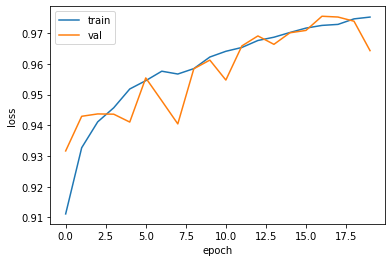

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


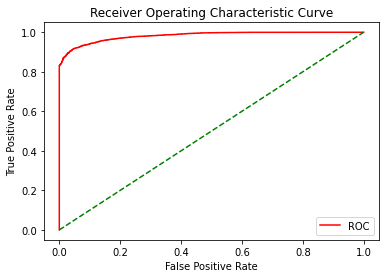

In [24]:
from sklearn import metrics

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
prob=sc.predict_proba(X_test)
prob=prob[:,1]
fper,tper,thresholds=metrics.roc_curve(y_test,prob)
plot_roc_curve(fper,tper)

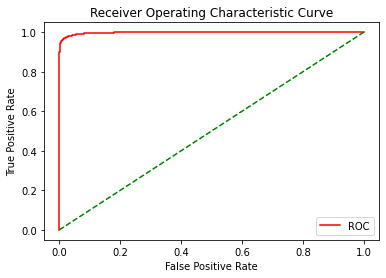

In [27]:
prob = model.predict(X_test)
prob = prob[:]
fper, tper, thresholds = metrics.roc_curve(y_test, prob)
plot_roc_curve(fper, tper)